---
# *Zindi - Cameroon Advance Analytic Ultrasound Image Challenge by Camair-AI*
---

## Participant Information

- *CHIMI YOUKAP OREAL*
- chimishaguile@gmail.com
- +237 671090017
- 4th year Computer Engineering, National Advanced School of Engineering Yaoundé (École Nationale Supérieure Polytechnique Yaoundé - ENSPY) 

---

# Login to Zindi


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -q git+https://github.com/eaedk/testing-zindi-package.git

In [ ]:
from zindi.user import Zindian

In [ ]:
my_username = "shaq"
user = Zindian(username = my_username)   # wop32Mz7@8PLWLLpC!z72093

Your password
>> ··········

[ 🟢 ] 👋🏾👋🏾 Welcome shaq 👋🏾👋🏾



In [ ]:
user.select_a_challenge(fixed_index=15)


[ 🟢 ] You choose the challenge : cameroon-advance-analytic-ultrasound-image-challenge,
	Given ultrasounds of kidneys can you detect renal failure?.



# Dataset Download

In [ ]:
user.download_dataset("/content/data")

/content/data/images.zip: 100%|██████████| 15.3M/15.3M [00:01<00:00, 11.4Mo/s]
/content/data/Train.csv: 100%|██████████| 1.58k/1.58k [00:00<00:00, 873ko/s]
/content/data/SampleSubmission.csv: 100%|██████████| 525/525 [00:00<00:00, 158ko/s]


In [ ]:
from zipfile import ZipFile

In [ ]:
file = ZipFile("/content/data/images.zip")
file.extractall("/content/kidney_images")

# EDA

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("/content/data/Train.csv")
train.head()

,img_IDs,target
0,ID_04UTZ83A24,0
1,ID_0URH2U2RON,1
2,ID_0ZEPOZGGQ1,0
3,ID_1595QTX5OA,1
4,ID_1RAE4SS5S6,1


In [ ]:
train.target.value_counts()

1    64
0    36
Name: target, dtype: int64

In [ ]:
test = pd.read_csv("/content/data/Test.csv")
test.head()

,img_IDs
0,ID_07VWE8S4AH
1,ID_1TTSQF7HN0
2,ID_21WVBU9ZMU
3,ID_2MHAFTL1KN
4,ID_37ULEGW12M


In [ ]:
print(train.shape, test.shape)

(100, 2) (34, 1)


In [ ]:
ss = pd.read_csv("/content/data/SampleSubmission.csv")
ss.head()

,img_IDs,target
0,ID_07VWE8S4AH,NaN
1,ID_1TTSQF7HN0,NaN
2,ID_21WVBU9ZMU,NaN
3,ID_2MHAFTL1KN,NaN
4,ID_37ULEGW12M,NaN


## Plot of some images



In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
img_id = train.img_IDs[0]
print(img_id)

ID_04UTZ83A24


(815, 1039)


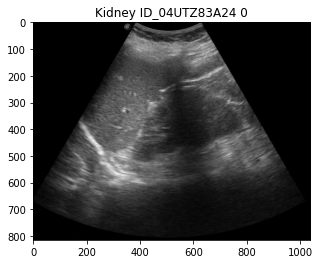

In [ ]:
image = cv2.imread("/content/kidney_images/CAMAIRAI BOX READY/" + img_id + ".jpg", 0) 
print(image.shape)
plt.imshow(image, cmap="gray")
plt.title("Kidney " + img_id + " "+ str(train.target[0]))
plt.show()

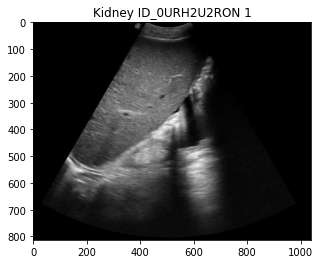

In [ ]:
img_id = train.img_IDs[1]
image = cv2.imread("/content/kidney_images/CAMAIRAI BOX READY/" + img_id + ".jpg", 0) 
plt.imshow(image, cmap="gray")
plt.title("Kidney " + img_id + " "+ str(train.target[1]))
plt.show()

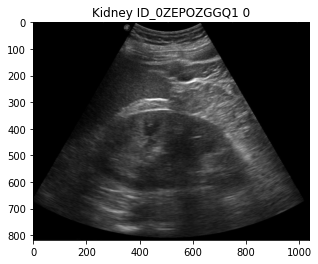

In [ ]:
img_id = train.img_IDs[2]
image = cv2.imread("/content/kidney_images/CAMAIRAI BOX READY/" + img_id + ".jpg", 0)
plt.imshow(image, cmap="gray")
plt.title("Kidney " + img_id + " "+ str(train.target[2]))
plt.show()

# Splitting and loading data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import os, random

In [ ]:
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)

random.seed(seed_value)
np.random.RandomState(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
images_dir = '/content/kidney_images/CAMAIRAI BOX READY'
train.img_IDs = train.img_IDs + '.jpg'
train.target = train.target.astype(str)

In [ ]:
infected_images = []
not_infected_images = []
for i in range(train.shape[0]):
  if train.loc[i, 'target'] ==  '1':
    infected_images.append(train.loc[i, 'img_IDs'])
  else: 
    not_infected_images.append(train.loc[i, 'img_IDs'])

In [ ]:
train_df = pd.DataFrame(columns=['img_IDs', 'target'])
valid_df = pd.DataFrame(columns=['img_IDs', 'target'])

def split_data(SPLIT_SIZE, images):
  global train_df, valid_df
  images_length = len(images)
  train_size = int(SPLIT_SIZE*images_length)
  for i in range(train_size):
      train_df = train_df.append(train[train.img_IDs == images[i]], ignore_index=True)
  for i in range(train_size, images_length):
      valid_df = valid_df.append(train[train.img_IDs == images[i]], ignore_index=True)

In [ ]:
split_size = .9
split_data(split_size, infected_images)
split_data(split_size, not_infected_images)

In [ ]:
train_df = shuffle(train_df, random_state=seed_value)
valid_df = shuffle(valid_df, random_state=seed_value)

In [ ]:
train_df.head()

,img_IDs,target
60,ID_5U4V0IXVWN.jpg,0
70,ID_F2DNQ30V9J.jpg,0
53,ID_VIHKY1YMMS.jpg,1
54,ID_WMAEWBL4SN.jpg,1
77,ID_L20KNWNMKG.jpg,0


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # width_shift_range=0.2,
    # zoom_range=0.2,
    # fill_mode='nearest'
    )

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        train_df,
        directory=images_dir, 
        x_col='img_IDs',
        y_col='target',
        target_size=(75, 75), 
        batch_size=30,
        class_mode='binary',
        seed=seed_value)

validation_generator = valid_datagen.flow_from_dataframe(
        valid_df,
        directory=images_dir,
        x_col='img_IDs',
        y_col='target',
        target_size=(75, 75),
        batch_size=5,
        class_mode='binary',
        seed=seed_value)

Found 89 validated image filenames belonging to 2 classes.
Found 11 validated image filenames belonging to 2 classes.


In [ ]:
test.img_IDs = test.img_IDs + '.jpg'

In [ ]:
# test data

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(test, 
                                                  directory=images_dir, 
                                                  x_col='img_IDs',
                                                  y_col=None,
                                                  target_size=(75, 75),
                                                  batch_size=20,
                                                  class_mode=None,
                                                  shuffle=False)

Found 34 validated image filenames.


# Model

In [ ]:
# Defining Callback

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.90 and epoch>100):
      print("\nReached validation accuracy > 0.9 so cancelling training!")
      self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
from tensorflow.keras.applications import ResNet50, InceptionResNetV2, InceptionV3

In [ ]:
pre_trained_model = InceptionV3(include_top=False, weights='imagenet',input_shape=(75,75,3))
# pre_trained_model = InceptionResNetV2(include_top=False, weights='imagenet',input_shape=(75,75,3))
# pre_trained_model = ResNet50(include_top=False, weights='imagenet',input_shape=(75,75,3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = True
  
# pre_trained_model.summary()

# last_layer = pre_trained_model.get_layer('mixed7')
# print('last layer output shape: ', last_layer.output_shape)
# last_output = last_layer.output


last_output = pre_trained_model.output

x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2, seed=seed_value)(x) 

x = tf.keras.layers.Dense(64, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.4, seed=seed_value)(x)   
# x = layers.Dense(64, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)              
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           

model = tf.keras.Model( pre_trained_model.input, x) 

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy', tf.keras.metrics.AUC(name='auc')])

history = model.fit_generator(
            generator=train_generator,
            validation_data = validation_generator,
            # steps_per_epoch = 8,
            epochs = 150,
            # validation_steps = 2,
            callbacks=[callbacks])

Epoch 1/150
3/3 [==============================] - 16s 3s/step - loss: 0.6181 - accuracy: 0.6404 - auc: 0.8317 - val_loss: 10.4543 - val_accuracy: 0.6364 - val_auc: 0.4464
Epoch 2/150
3/3 [==============================] - 7s 2s/step - loss: 0.6968 - accuracy: 0.9551 - auc: 0.9043 - val_loss: 13.7401 - val_accuracy: 0.6364 - val_auc: 0.0714
Epoch 3/150
3/3 [==============================] - 7s 2s/step - loss: 0.6143 - accuracy: 0.9213 - auc: 0.9282 - val_loss: 68.8830 - val_accuracy: 0.6364 - val_auc: 0.3571
Epoch 4/150
3/3 [==============================] - 7s 2s/step - loss: 0.1972 - accuracy: 0.9775 - auc: 0.9690 - val_loss: 6.1096 - val_accuracy: 0.4545 - val_auc: 0.6429
Epoch 5/150
3/3 [==============================] - 7s 2s/step - loss: 0.1462 - accuracy: 0.9438 - auc: 0.9852 - val_loss: 145.0019 - val_accuracy: 0.3636 - val_auc: 0.5000
Epoch 6/150
3/3 [==============================] - 7s 2s/step - loss: 0.0925 - accuracy: 0.9775 - auc: 0.9910 - val_loss: 8.1966 - val_accuracy:

# Training plot

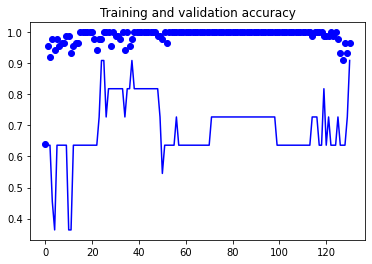

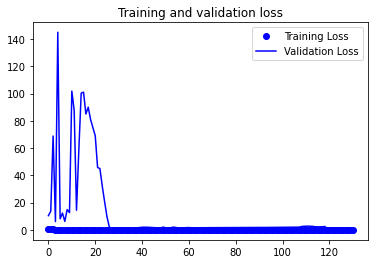

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluating model

In [ ]:
model.evaluate_generator(generator=validation_generator)

[0.4200119078159332, 0.9090909361839294, 1.0]

In [ ]:
valid_preds = model.predict(validation_generator)
valid_preds

array([[0.7917909 ],
       [0.5580231 ],
       [0.9965247 ],
       [0.00252301],
       [0.0535996 ],
       [0.6775441 ],
       [0.01773858],
       [0.9819387 ],
       [0.6785109 ],
       [0.00705084],
       [0.0494948 ]], dtype=float32)

# Predictions on Test set


In [ ]:
ss.target = model.predict(test_generator)

In [ ]:
ss.target.describe()

count    34.000000
mean      0.505726
std       0.450314
min       0.000602
25%       0.016608
50%       0.738603
75%       0.958265
max       0.998740
Name: target, dtype: float64

In [ ]:
ss.head()

,img_IDs,target
0,ID_07VWE8S4AH,0.802146
1,ID_1TTSQF7HN0,0.011884
2,ID_21WVBU9ZMU,0.981092
3,ID_2MHAFTL1KN,0.108803
4,ID_37ULEGW12M,0.003697


# Submission

In [ ]:
ss.to_csv("/content/submit.csv", index=False)

In [ ]:
user.which_challenge


[ 🟢 ] You are currently enrolled in : cameroon-advance-analytic-ultrasound-image-challenge challenge,
	Given ultrasounds of kidneys can you detect renal failure?.



'cameroon-advance-analytic-ultrasound-image-challenge'

In [ ]:
user.submit(filepaths=["/content/submit.csv"], comments=[" Final submission"])

Submit content/submit.csv: 100%|███████████████████████████████| 1.13k/1.13k [00:00<00:00, 1.95ko/s]


[ 🟢 ] Submission ID: bhrY9Aqj - File submitted : /content/submit.csv



In [ ]:
user.submission_board()

__________________________________________________________________________________________________________________________________
|      |          |                  |                |                               |                         
|status|    id    |       date       |     score      |           filename            |         comment         
|      |          |                  |                |                               |                         
----------------------------------------------------------------------------------------------------------------------------------
|  🟢  | bhrY9Aqj |02 Jun 2021, 10:36| 0.863636363636 |submit.csv                     | Final submission                       
----------------------------------------------------------------------------------------------------------------------------------
|  🟢  | ZQ66CrBA |28 May 2021, 17:35| 0.681818181818 |submission.csv                 |Baseline                                
--------------

## Save model

In [ ]:
model.save('/content/drive/MyDrive/datasets/zindi/camairai/kidney_pb/model/model_92.h5')